<a href="https://colab.research.google.com/github/esmaeilifardi/DecisionTreeClassifier---Penguins.csv-Dataset/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguins = pd.read_csv('penguins.csv')
df = pd.DataFrame(penguins)

In [ ]:
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
df.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
#Number of breeds of penguins (target)
df['species'].value_counts()
##Number of Island
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
#see count of null values:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
# see null values row
df[df.isnull().any(axis=1)]
# two columns are more than %55 null can drop 

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [ ]:
df.drop([3,271], axis=0, inplace=True)

In [ ]:
# now we see null values are in the sex column
df.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64

In [ ]:
#Instead of filling in blank data with mean, median and mode methods, we try to guess the gender of penguins based on descriptive data such as ranges of beak sizes and weights of males and females.
df[df['species'] == 'Gentoo'].groupby('sex').describe()

rowid                                                             \
       count        mean        std    min     25%    50%    75%    max   
sex                                                                       
female  58.0  212.931034  35.796139  153.0  184.25  212.0  242.5  275.0   
male    61.0  213.967213  35.663692  154.0  183.00  214.0  244.0  276.0   

       bill_length_mm             ... body_mass_g          year               \
                count       mean  ...         75%     max count         mean   
sex                               ...                                          
female           58.0  45.563793  ...      4875.0  5200.0  58.0  2008.068966   
male             61.0  49.473770  ...      5700.0  6300.0  61.0  2008.065574   

                                                          
             std     min     25%     50%     75%     max  
sex                                                       
female  0.791669  2007.0  2007.0  2008.0  2009.0  2009.0  
male    0.793071  2007.0  2007.0  2008.0  2009.0  2009.0  

[2 rows x 48 columns]

In [ ]:
#df.at[336, 'sex'] = 'female'

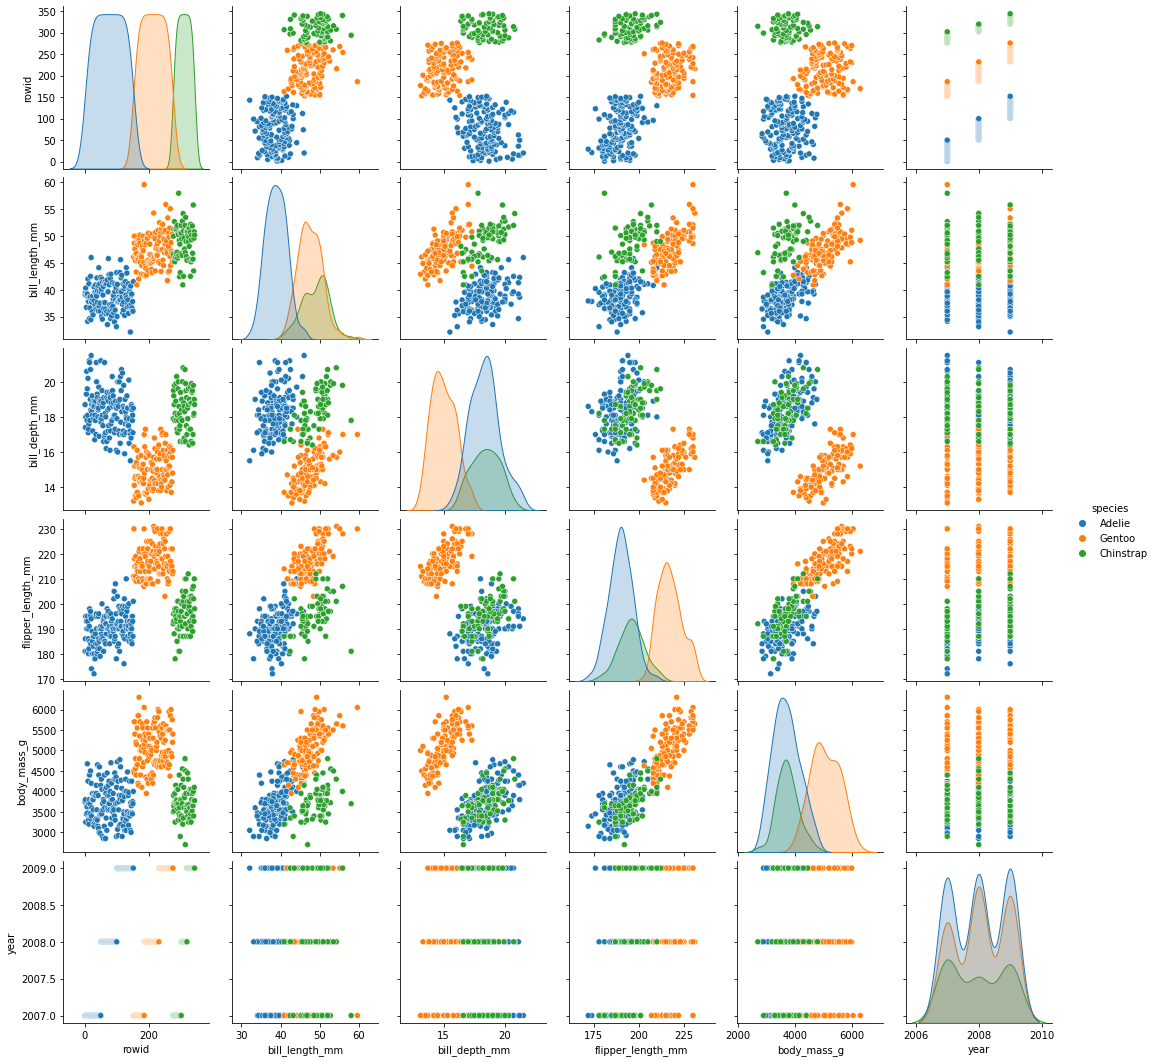

In [ ]:
sns.pairplot(df, hue ='species')

In [ ]:
df[df.isnull().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [ ]:
df.ffill(inplace=True)

In [ ]:
df[df.isnull().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [ ]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first= True)

In [ ]:
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 101, test_size= 0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      1.00      1.00        42

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


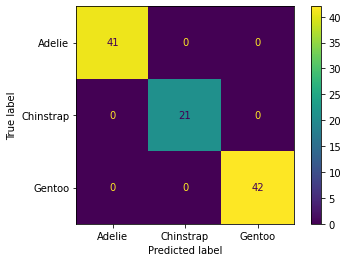

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
model.feature_importances_    # zarib

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
pd.DataFrame(data=model.feature_importances_, index= X.columns , columns= ['feature_importances']).sort_values('feature_importances') #tandil be dataframe

,feature_importances
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
year,0.0
island_Dream,0.0
island_Torgersen,0.0
sex_male,0.0
rowid,1.0


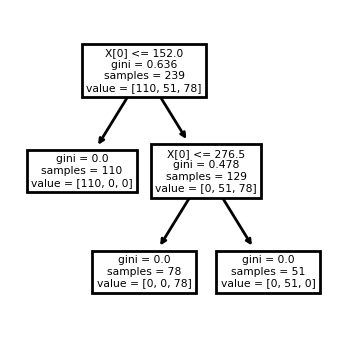

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize= (2, 2), dpi=200)
plot_tree(model);                   #semicolon baese hazfe tozihat mishavad

In [ ]:
def report_model(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_pred, y_test))
  print('\n')
  from sklearn.tree import plot_tree
  plt.figure(figsize= (2, 2), dpi=200)
  plot_tree(model);                   #semicolon baese hazfe tozihat mishavad

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        45

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103





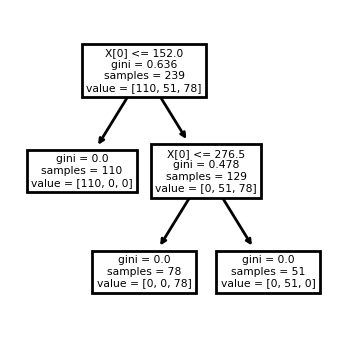

In [ ]:
report_model(model)